In [1]:
from Functions_base import T31, T32, T39, T61, T87
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

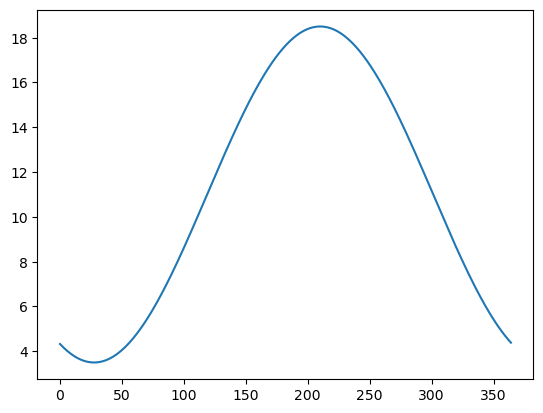

In [3]:
# I will fit this shape of hobbelen curve to the wheat data
def dd(t,a,b,c):
    return a + b*np.sin((2*np.pi/365)*(t - c))

# Input the Hobbelen parameters
plt.plot(dd(np.arange(0,365,1),11,7.5,118.75))

In [4]:
# https://farmpep.net/sites/default/files/2022-12/Wheat%20Growth%20Guide_2008_UK%20%281%29.pdf
# T31 is 10th April, day 202
# T39 is 19th May, day 241
# T61 is 11th June, day 264
# T87 is 29th July, day 312

# Day 1 is 20th September

9.40558813539575 7.183694895402773 245.69943375986816


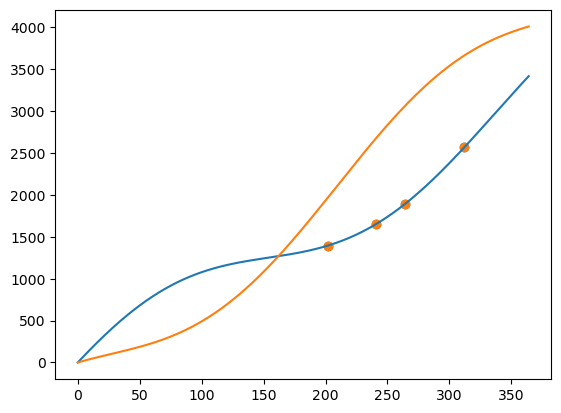

In [5]:
# Set up data
idx = [202,241,264,312]
data_array = np.array([T31,T39,T61,T87])

# Set up array
a = 11
b = 7.5
c = 118.75

# Compute the cumulative degree days on each day with this a,b,c
def func_dd_so_far(a,b,c):
    dd_so_far = np.zeros(365)
    for i in range(1,365):
        dd_so_far[i] = dd_so_far[i-1] + dd(i,a,b,c)

#     # Drop the first day so that "day 1" is 0 and all other days are shifted back by 1
#     dd_so_far = dd_so_far[1:]
    return dd_so_far

def fit_for_paras(x):
    a,b,c = x
    dd_so_far = func_dd_so_far(a,b,c)
    
    # Return the difference between this and the values from the Milne paper
    return np.linalg.norm(dd_so_far[idx] - data_array)

a,b,c = minimize(fit_for_paras, [a,b,c],method="Nelder-Mead")["x"]
plt.plot(func_dd_so_far(a,b,c))
plt.scatter(idx,data_array)

print(a,b,c)

plt.plot(func_dd_so_far(11,7.5,118.75))
plt.scatter(idx,data_array)

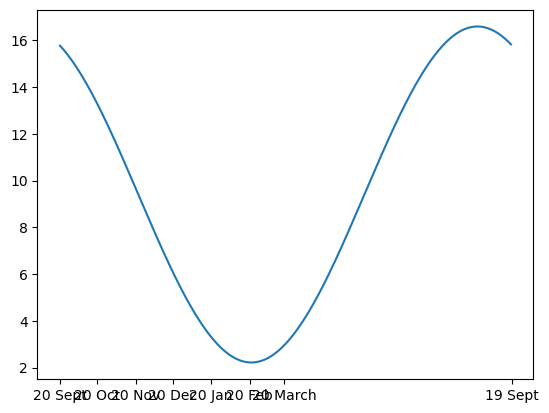

In [6]:
# First day is 245 days after 20th September24
plt.plot(dd(np.arange(0,365,1),a,b,c))
plt.xticks(ticks = [0,30,61,91,122,153,181,365],labels = ["20 Sept","20 Oct","20 Nov","20 Dec","20 Jan", "20 Feb", "20 March", "19 Sept"])
plt.show()

# The below is the original fitting
# a = 11
# b = 7.5
# c = 118.74
# plt.plot(dd(np.arange(0,365,1),a,b,c))
# plt.xticks(ticks = [0,30,61,91,122,153,181,365],labels = ["20 Sept","20 Oct","20 Nov","20 Dec","20 Jan", "20 Feb", "20 March", "19 Sept"])

In [7]:
T = pd.read_excel("Hobbelen_data/T - winter wheat_old.xlsx",header=None)

# Replace the Hobbelen DD data with mine
T.iloc[:,2] = dd(np.arange(0,365,1),a,b,c)

# Round to get the cumulative DD for each day
new_cumsum = np.round(func_dd_so_far(a,b,c))
T.iloc[:,3] = new_cumsum
print(T)
T.to_excel("Hobbelen_data/T - winter wheat_mine.xlsx",header=None,index=None)

/tmp/ipykernel_14606/1856291701.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  T.iloc[:,3] = new_cumsum


             0    1          2       3   4   5   6
0   2010-09-20    1  15.767948     0.0 NaN NaN NaN
1   2010-09-21    2  15.709590    16.0 NaN NaN NaN
2   2010-09-22    3  15.649363    31.0 NaN NaN NaN
3   2010-09-23    4  15.587286    47.0 NaN NaN NaN
4   2010-09-24    5  15.523378    62.0 NaN NaN NaN
..         ...  ...        ...     ...  ..  ..  ..
360 2011-09-15  361  16.031135  3354.0 NaN NaN NaN
361 2011-09-16  362  15.982365  3370.0 NaN NaN NaN
362 2011-09-17  363  15.931646  3386.0 NaN NaN NaN
363 2011-09-18  364  15.878993  3401.0 NaN NaN NaN
364 2011-09-19  365  15.824421  3417.0 NaN NaN NaN

[365 rows x 7 columns]
